In [1]:
# Importamos librerias necesarias

import pandas as pd
import numpy as np
import os
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets
# from MDLP import MDLP_Discretizer
warnings.filterwarnings("ignore")

directory_path = os.getcwd()
print("My current directory is : " + directory_path)

My current directory is : c:\Users\eibarrol\Documents\IA\Planificacion


In [2]:
# A LO MEJOR NO HACE FALTA HACER ESTO

# CALCULAMOS LA DURACION DEL CONTRATO: 
# UltimaFechaAlbaran - PrimeraFechaAlbaran = DiasDuracionContrato
# fechas = pd.read_csv(directory_path + '/FechasAlbaranPorContrato_ESP.csv') # Aqui se incluyen todas las fechas de los contratos TERMINADOS
# fechas = pd.read_csv(directory_path + '/fechasAlbaranPorContrato_ESP_Prueba1.csv') # Aqui se incluyen todas las fechas de los contratos TERMINADOS
# fechas = pd.read_csv(directory_path + '/FechasAlbaranesPorContrato_Prueba2.csv') # Aqui se incluyen todas las fechas de los contratos TERMINADOS -- Sum y Dev -- Calculamos así cuanto dura el contrato o Working Time
fechas = pd.read_csv(directory_path + '/FechasAlbaranesPorContrato_Prueba3.csv') # Aqui se incluyen todas las fechas de los contratos TERMINADOS -- Sum y Dev -- Calculamos así cuanto dura el contrato o Working Time
fechas['FechaAlbaran'] = pd.to_datetime(fechas['FechaAlbaran'], infer_datetime_format= True)
fechas = fechas.sort_values(by=['NumContrato','FechaAlbaran'], ignore_index=True)
# fechas.head(40)

fechas2 = fechas.drop(columns='FechaAlbaran')
# fechas2 = fechas2.drop(columns='FecContrato')
# fechas2 = fechas2.drop(columns='PesoSum')

durs = list()
for i in range(len(fechas)-1):
   if fechas.NumContrato.iloc[i] != fechas.NumContrato.iloc[i-1]:
       d1 = fechas['FechaAlbaran'].iloc[i]
       
   if fechas.NumContrato.iloc[i] != fechas.NumContrato.iloc[i+1]:
       d2 = fechas['FechaAlbaran'].iloc[i]
       x = i
       inic = i-x
       dur = d2 - d1
       durs.append(dur)
        # print(fechas['NumContrato'].iloc[i],d1, d2, dur, len(durs))
    #    break

In [3]:
# fechas

In [4]:
fechas2 = fechas2.drop_duplicates(ignore_index=True)
fechas2.drop(index=fechas2.index[-1], axis=0, inplace=True) # Prescindimos de la ultima fila para que encaje
fechas2['DiasCto'] = durs
fechas2

,NumContrato,DiasCto
0,130527,455 days
1,130658,49 days
2,130812,281 days
3,132159,438 days
4,132244,353 days
...,...,...
1044,509704,118 days
1045,509713,28 days
1046,509730,213 days
1047,509759,0 days


In [5]:
# Calculamos el Periodo de DEVOLUCION = Ultima Fecha Albaran DEVOLUCION - Primer Fecha Albaran DEVOLUCION 

# dev = pd.read_csv(directory_path + '/PeriodoDEVOLUCION_ES_Prueba1.csv') 
# dev = pd.read_csv(directory_path + '/PeriodoDev_Prueba2.csv')  # Solo devoluciones, con 2022 incluido
dev = pd.read_csv(directory_path + '/PeriodoDev_Prueba3.csv')  # Solo devoluciones, con 2022 incluido -- Sin Comerciales
# per = pd.read_csv(directory_path + '/Prueba1_SUMyDEV.csv') 
# Este primer caso solo considera: 
#   - Filial = ES
#   - Delegación = ESTE
#   - División = EDIFICACIÓN RESIDENCIAL
#   - Familia = ANDAMIOS BRIO
#   - Comercial = EANDI VEGA, GABRIEL
# Además de los filtros: TipoContrato = AFP, Contratos de estado TERMINADO, etc.

dev['FechaAlbaran'] = pd.to_datetime(dev['FechaAlbaran'], infer_datetime_format= True)
dev = dev.sort_values(by=['NumContrato','FechaAlbaran'], ignore_index=True)

dev2 = dev.drop(columns='FechaAlbaran')

dursdev = list()
for i in range(len(dev)-1):
   if dev.NumContrato.iloc[i] != dev.NumContrato.iloc[i-1]:
       dd1 = dev['FechaAlbaran'].iloc[i]
       
   if dev.NumContrato.iloc[i] != dev.NumContrato.iloc[i+1]:
       dd2 = dev['FechaAlbaran'].iloc[i]
       xd = i
       inic = i-xd
       durdev = dd2 - dd1
       dursdev.append(durdev)

In [6]:
dev2 = dev2.drop_duplicates(ignore_index=True)
dev2.drop(index=dev2.index[-1], axis=0, inplace=True) # Prescindimos de la ultima fila para que encaje
dev2['PeriDev'] = dursdev
# dev2

In [7]:
# Calculamos el Periodo de Suministro = Ultima Fecha Albaran Suministro - Primer Fecha Albaran Suministro 

# per = pd.read_csv(directory_path + '/PeriodoSuministro_ES_Prueba1.csv') 
# per = pd.read_csv(directory_path + '/PeriodoSuministro_ES_Prueba2.csv') # Se ha añadido 2022
per = pd.read_csv(directory_path + '/PeriodoSuministro_ES_Prueba3.csv') # Se ha añadido 2022 -- Sin Comerciales
# per = pd.read_csv(directory_path + '/Prueba1_SUMyDEV.csv') 
# Este primer caso solo considera: 
#   - Filial = ES
#   - Delegación = ESTE
#   - División = EDIFICACIÓN RESIDENCIAL
#   - Familia = ANDAMIOS BRIO
#   - Comercial = EANDI VEGA, GABRIEL
# Además de los filtros: TipoContrato = AFP, Contratos de estado TERMINADO, etc.

per['FechaAlbaran'] = pd.to_datetime(per['FechaAlbaran'], infer_datetime_format= True)
per = per.sort_values(by=['NumContrato','FechaAlbaran'], ignore_index=True)

per2 = per.drop(columns='FechaAlbaran')

dursper = list()
for i in range(len(per)-1):
   if per.NumContrato.iloc[i] != per.NumContrato.iloc[i-1]:
       d1 = per['FechaAlbaran'].iloc[i]
       
   if per.NumContrato.iloc[i] != per.NumContrato.iloc[i+1]:
       d2 = per['FechaAlbaran'].iloc[i]
       x = i
       inic = i-x
       durper = d2 - d1
       dursper.append(durper)

In [8]:
# per

In [9]:
# per2

In [10]:
per2 = per2.drop_duplicates(ignore_index=True)
per2.drop(index=per2.index[-1], axis=0, inplace=True) # Prescindimos de la ultima fila para que encaje
per2['PeriSum'] = dursper
per2

,NumContrato,PeriSum
0,130527,0 days
1,130658,41 days
2,130812,193 days
3,132159,382 days
4,132244,268 days
...,...,...
1014,509704,11 days
1015,509713,0 days
1016,509730,185 days
1017,509759,0 days


In [11]:
# Importamos los registros de Albaranes, con su correspondiente fecha y el peso suministrado. Siempre teniendo en cuenta los filtros para cada prueba
# movDef = pd.read_csv(directory_path + '/RANGOSEMANAL_Prueba1.csv') 
# movDef = pd.read_csv(directory_path + '/RANGOSEMANAL_Prueba2.csv') # Esto son suministros

# movDef = pd.read_csv(directory_path + '/Prueba1_SUMyDEV.csv') # Esto son suministros y devoluciones
# movDef = pd.read_csv(directory_path + '/Prueba2_SUMyDEV.csv') # Esto son suministros y devoluciones
movDef = pd.read_csv(directory_path + '/Prueba3_SUMyDEV_SinCom.csv') # Esto son suministros y devoluciones -- Sin Comerciales

movDef.NumContrato = movDef.NumContrato.astype(int)
movDef['FechaAlbaran'] = pd.to_datetime(movDef['FechaAlbaran'], infer_datetime_format= True)
movDef = movDef.sort_values(by=['NumContrato', 'FechaAlbaran'], ignore_index=True)
print(len(movDef))

movDef['PesoSum'] = movDef['PesoSum'].str.replace(',','.')
movDef.PesoSum = movDef.PesoSum.astype(float)

#Inicializamos nuevas columnas
movDef['PesoSumAcum']=movDef['PesoSum']
movDef['PtjeDurac']=movDef['PesoSum']
movDef['Semana']=movDef['PesoSum']

movDeff = pd.DataFrame()

11211


In [12]:
movDef = pd.merge(movDef, fechas2, how='inner', on=['NumContrato'])
movDef = pd.merge(movDef, per2, how='inner', on=['NumContrato'])
movDef = pd.merge(movDef, dev2, how='inner', on=['NumContrato'])

ctos = movDef.NumContrato.unique()

In [13]:
def timedelta_to_integer(catsPL):
    # catsPL.DiasCto = catsPL.DiasCto.astype(str)
    # catsPL[['DiasContrato','Borrar']] = catsPL.DiasCto.str.split(expand=True)
    # catsPL.DiasContrato = catsPL.DiasContrato.astype(int)
    catsPL.DiasCto = catsPL.DiasCto.astype(str)
    catsPL[['DiasCto','BorrarF']] = catsPL.DiasCto.str.split(expand=True)
    catsPL.DiasCto = catsPL.DiasCto.astype(int)

    catsPL.PeriSum = catsPL.PeriSum.astype(str)
    catsPL[['PeriSum','BorrarF']] = catsPL.PeriSum.str.split(expand=True)
    catsPL.PeriSum = catsPL.PeriSum.astype(int)
    # print(catsPL.DiasCto.iloc[i], type(catsPL.DiasCto.iloc[i]), d)

    catsPL.PeriDev = catsPL.PeriDev.astype(str)
    catsPL[['PeriDev','BorrarF']] = catsPL.PeriDev.str.split(expand=True)
    catsPL.PeriDev = catsPL.PeriDev.astype(int)

    catsPL = catsPL.drop(columns='BorrarF')
    
timedelta_to_integer(movDef)

In [14]:
movDef

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,PtjeDurac,Semana,DiasCto,PeriSum,PeriDev,BorrarF
0,130527,1624.62,2017-01-26,1624.62,1624.62,1624.62,455,0,338,days
1,130527,-1169.60,2017-05-23,-1169.60,-1169.60,-1169.60,455,0,338,days
2,130527,-960.30,2017-07-21,-960.30,-960.30,-960.30,455,0,338,days
3,130527,-1002.20,2018-04-26,-1002.20,-1002.20,-1002.20,455,0,338,days
4,130658,1362.70,2017-01-26,1362.70,1362.70,1362.70,49,41,44,days
...,...,...,...,...,...,...,...,...,...,...
11013,509785,-4968.50,2019-09-03,-4968.50,-4968.50,-4968.50,1125,775,1084,days
11014,509785,-1727.30,2019-10-21,-1727.30,-1727.30,-1727.30,1125,775,1084,days
11015,509785,-18.00,2019-11-29,-18.00,-18.00,-18.00,1125,775,1084,days
11016,509785,-1806.10,2019-12-17,-1806.10,-1806.10,-1806.10,1125,775,1084,days


In [15]:
try:
    for i in range(len(movDef)):
        if movDef.DiasCto[i] < movDef.PeriSum[i] or movDef.DiasCto[i] < movDef.PeriDev[i]:
            print('El contrato dura menos que el periodo de suministro o el de devolucion-- Problemas en Contrato: ' + str(movDef.NumContrato[i]))
            print(i)
        # if movDef.PeriSum[i] == 0:
        #     print('Quitamos!')
        #     movDef = movDef.drop(i) # No tiene sentido quitar -- igual es un contrato con un solo suministro
except:
    print('No hace falta, hemos quitado los DiasCto')


In [16]:
# grouped = movDef.groupby(movDef.NumContrato)
# print(grouped.NumContrato.value_counts())

In [17]:
ctos = movDef.NumContrato.unique()

for i in ctos:
    # print('Ejecutando...')
    grouped = movDef.groupby(movDef.NumContrato)
    df1 = grouped.get_group(i)
    df1 = df1.sort_values(by=['FechaAlbaran'], ignore_index=True)
    lendf1 = len(df1)
    restar = math.floor(lendf1 * 0.1)
    # print(lendf1, restar)
    duracion = df1.FechaAlbaran.iloc[len(df1)-1]-df1.FechaAlbaran.iloc[0]
    # print(duracion)

    for j in range(len(df1)):
        # if movDef.NumContrato.iloc[j]==i:
        if j==0 or df1.NumContrato.iloc[j] != df1.NumContrato.iloc[j-1]:
            df1.PesoSumAcum.iloc[j] = df1.PesoSum.iloc[j]
            df1.PtjeDurac.iloc[j] = 0
            df1.Semana.iloc[j] = 1
            continue
        # if mov.NumContrato.iloc[i] != mov.NumContrato.iloc[i-1]:
        #     continue
        if df1.FechaAlbaran.iloc[len(df1)-1] == df1.FechaAlbaran.iloc[0]:
            print('Problem')
            continue
        df1.PesoSumAcum.iloc[j] = df1.PesoSum.iloc[j] + df1.PesoSumAcum.iloc[j-1]
        # x = (mov.FechaMov.iloc[len(mov)-1]-mov.FechaMov.iloc[i])/duracion
        # x = (movDef.FechaAlbaran.iloc[len(movDef)-1]-movDef.FechaAlbaran.iloc[j])/duracion
        # print(df1.FechaAlbaran.iloc[len(df1)-1]-df1.FechaAlbaran.iloc[j], '/', duracion)
        x = (df1.FechaAlbaran.iloc[len(df1)-1]-df1.FechaAlbaran.iloc[j])/duracion
        # y = (mov.FechaMov.iloc[len(mov)-1]-mov.FechaMov.iloc[i])
        # y = (movDef.FechaAlbaran.iloc[len(movDef)-1]-movDef.FechaAlbaran.iloc[j])
        y = (df1.FechaAlbaran.iloc[len(df1)-1]-df1.FechaAlbaran.iloc[j])
        # print('Es la semana:', math.floor((duracion.days/7)-(y.days/7)+1))
        df1.Semana.iloc[j] = math.floor((duracion.days/7)-(y.days/7)+1)
        # movDef.Semana.iloc[j] = math.floor((duracion.days/7)-(y.days/7)+1)
        df1.PtjeDurac.iloc[j] = (1 - x)*100
        # movDef.PtjeDurac.iloc[j] = (1 - x)*100
    # print(j-restar)
    if df1.PesoSumAcum.iloc[j]<0:
        continue
    
    # if df1.SumPeso.iloc[j-restar]>1050:
    #     continue
    
    movDeff = movDeff.append(df1)
movDeff = movDeff.drop(columns='BorrarF')

In [18]:
movDeff

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,PtjeDurac,Semana,DiasCto,PeriSum,PeriDev
0,130812,351.8,2017-07-13,351.8,0.000000,1.0,281,193,198
1,130812,657.7,2017-08-30,1009.5,17.081851,7.0,281,193,198
2,130812,233.8,2017-09-20,1243.3,24.555160,10.0,281,193,198
3,130812,484.6,2017-09-21,1727.9,24.911032,11.0,281,193,198
4,130812,233.8,2017-09-27,1961.7,27.046263,11.0,281,193,198
...,...,...,...,...,...,...,...,...,...
6,509730,-265.7,2017-02-10,433.7,40.845070,13.0,213,185,204
7,509730,133.2,2017-04-06,566.9,66.666667,21.0,213,185,204
8,509730,-360.3,2017-04-23,206.6,74.647887,23.0,213,185,204
9,509730,552.6,2017-05-19,759.2,86.854460,27.0,213,185,204


In [19]:
def insert(df, row):
    insert_loc = df.index.max()

    if pd.isna(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row
    return df

In [20]:
# movDeff.Semana.iloc[0]

In [21]:
cts = movDeff.NumContrato.unique()
print('Se trabaja con', len(cts), 'contratos')

Se trabaja con 849 contratos


In [22]:
movDeff[movDeff['NumContrato']==134655]

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,PtjeDurac,Semana,DiasCto,PeriSum,PeriDev
0,134655,3274.60,2018-01-22,3274.60,0.000000,1.0,260,189,259
1,134655,-90.20,2018-01-23,3184.40,0.384615,1.0,260,189,259
2,134655,2370.60,2018-01-24,5555.00,0.769231,1.0,260,189,259
3,134655,2924.20,2018-01-25,8479.20,1.153846,1.0,260,189,259
4,134655,2717.00,2018-01-26,11196.20,1.538462,1.0,260,189,259
5,134655,-736.70,2018-01-29,10459.50,2.692308,2.0,260,189,259
6,134655,7206.74,2018-03-22,17666.24,22.692308,9.0,260,189,259
7,134655,1242.26,2018-03-23,18908.50,23.076923,9.0,260,189,259
8,134655,-2385.30,2018-04-10,16523.20,30.000000,12.0,260,189,259
9,134655,3519.40,2018-04-17,20042.60,32.692308,13.0,260,189,259


In [23]:
# Vamos a probar modelos
# Quitamos PesoSumAcum, FechaAlbaran y el PtjeDurac -- Mejor consideramos el PesoSumAcum como el peso total suministrado, por probar, y ponemos PtjeDurac 100 para decir que se ha acabado (o que se deberia acabar)

movDeff = movDeff.drop(columns=['PtjeDurac'])
movDefin = pd.DataFrame()
df = pd.DataFrame()

cts = movDeff.NumContrato.unique()
ct = 1

for i in cts:
    
    # print('Ejecutando...')
    grouped = movDeff.groupby(movDeff.NumContrato)
    df1 = grouped.get_group(i)
    df1 = df1.sort_values(by=['Semana'], ignore_index=True)

    l = len(df1)
    # print(l)
    if l == 1:
        continue

    m = df1[df1['Semana']==df1['Semana'].max()]['Semana'].reset_index().Semana[0]
    maxSem = 0
    j = 0

    while (maxSem<=m):
        # print('Contrato #', ct, i, '-->', 'j:', j, 'maxSem:', maxSem, 'm:', m, 'Length df1 hasieran:', l, 'Length df1 orain:', len(df1))
        # print('Semana del siguiente registro:', df1.Semana.iloc[j+1], 'Semana siguiente a la del registro actual', df1.Semana.iloc[j] + 1)
        if (j+1)==len(df1):
            maxSem=m+1
            continue

        if df1.Semana.iloc[j+1] == df1.Semana.iloc[j] and df1.PesoSum.iloc[j+1] != 0:
            j+=1
            # print('HOLA!')
            continue

        if df1.Semana.iloc[j+1] != df1.Semana.iloc[j] + 1:
            df1.loc[j + 0.5] = [df1.NumContrato.iloc[j], 
                                0, 
                                0, 
                                df1.PesoSumAcum.iloc[j], 
                                df1.Semana.iloc[j]+1,
                                df1.DiasCto.iloc[j], 
                                df1.PeriSum.iloc[j],
                                df1.PeriDev.iloc[j]
                                ]
            # df1 = df1.append({'NumContrato':df1.NumContrato.iloc[j], 'PesoSum':0, 'FechaAlbaran':0, 'PesoSumAcum':df1.PesoSumAcum.iloc[j], 'Semana':df1.Semana.iloc[j]+1, 'PeriSum':df1.PeriSum.iloc[j]}, ignore_index=True)
            df1 = df1.sort_index().reset_index(drop=True)
            maxSem = df1.Semana.iloc[j] # +1
        j+=1

    ct += 1
    df1 = df1.sort_index().reset_index(drop=True)
    movDefin = movDefin.append(df1)
# for i in range(len(movDeff)-1):
#     if i == 0:
#         df = movDeff
#     else: 
#         df = df 
        
#     if df.Semana.iloc[i+1] != df.Semana.iloc[i] + 1:
#         df = insert(df, [df.NumContrato.iloc[i], 0, 0, df.PesoSumAcum.iloc[i], df.Semana.iloc[i]+1, df.PeriSum.iloc[i]]) #  movDeff.DiasCto.iloc[i],

# movDeff = df

movDeff2 = movDeff

# movDeff = movDeff.sort_values(by=['NumContrato', 'Semana'], ignore_index=False)
# movDeff

PesoSum en realidad es solo Peso -- PesoSum es una errata

In [24]:
# df1

In [25]:
aa = movDeff[movDeff['NumContrato']==509701]
# aa

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,Semana,DiasCto,PeriSum,PeriDev
0,509701,2566.12,2016-11-07,2566.12,1.0,303,116,278
1,509701,5200.40,2016-11-08,7766.52,1.0,303,116,278
2,509701,4367.12,2016-11-23,12133.64,3.0,303,116,278
3,509701,1831.40,2016-11-28,13965.04,4.0,303,116,278
4,509701,-1308.30,2016-12-02,12656.74,4.0,303,116,278
5,509701,1753.49,2017-01-17,14410.23,11.0,303,116,278
6,509701,5425.70,2017-03-03,19835.93,17.0,303,116,278
7,509701,-3748.80,2017-03-16,16087.13,19.0,303,116,278
8,509701,-5039.40,2017-04-06,11047.73,22.0,303,116,278
9,509701,-3347.80,2017-05-31,7699.93,30.0,303,116,278


In [26]:
ss = movDefin[movDefin['NumContrato']==509701.0]
ss= ss.sort_index().reset_index(drop=True)
# ss

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,Semana,DiasCto,PeriSum,PeriDev
0,509701.0,2566.12,2016-11-07 00:00:00,2566.12,1.0,303.0,116.0,278.0
1,509701.0,5200.40,2016-11-08 00:00:00,7766.52,1.0,303.0,116.0,278.0
2,509701.0,0.00,0.0,7766.52,2.0,303.0,116.0,278.0
3,509701.0,4367.12,2016-11-23 00:00:00,12133.64,3.0,303.0,116.0,278.0
4,509701.0,1831.40,2016-11-28 00:00:00,13965.04,4.0,303.0,116.0,278.0
5,509701.0,-1308.30,2016-12-02 00:00:00,12656.74,4.0,303.0,116.0,278.0
6,509701.0,0.00,0.0,12656.74,5.0,303.0,116.0,278.0
7,509701.0,0.00,0.0,12656.74,6.0,303.0,116.0,278.0
8,509701.0,0.00,0.0,12656.74,7.0,303.0,116.0,278.0
9,509701.0,0.00,0.0,12656.74,8.0,303.0,116.0,278.0


In [27]:
movDefinSum = movDefin
movDefinDev = movDefin

movDefinSum = movDefinSum.drop(columns=['PeriDev'])
movDefinDev = movDefinDev.drop(columns=['PeriSum'])

for i in range(len(movDefinSum)):
    if movDefinSum.PesoSum.iloc[i] <0:
        movDefinSum.PesoSum.iloc[i] = 0
        movDefinSum.FechaAlbaran.iloc[i] = 0

    if movDefinDev.PesoSum.iloc[i] >0:
        movDefinDev.PesoSum.iloc[i] = 0
        movDefinDev.FechaAlbaran.iloc[i] = 0

In [28]:
# print(len(movDefinSum), len(movDefinDev))

29695 29695


In [29]:
# movDefinSum
ss = movDefinSum[movDefinSum['NumContrato']==509701.0]
ss= ss.sort_index().reset_index(drop=True)
# ss

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,Semana,DiasCto,PeriSum
0,509701.0,2566.12,2016-11-07 00:00:00,2566.12,1.0,303.0,116.0
1,509701.0,5200.40,2016-11-08 00:00:00,7766.52,1.0,303.0,116.0
2,509701.0,0.00,0.0,7766.52,2.0,303.0,116.0
3,509701.0,4367.12,2016-11-23 00:00:00,12133.64,3.0,303.0,116.0
4,509701.0,1831.40,2016-11-28 00:00:00,13965.04,4.0,303.0,116.0
5,509701.0,0.00,0,12656.74,4.0,303.0,116.0
6,509701.0,0.00,0.0,12656.74,5.0,303.0,116.0
7,509701.0,0.00,0.0,12656.74,6.0,303.0,116.0
8,509701.0,0.00,0.0,12656.74,7.0,303.0,116.0
9,509701.0,0.00,0.0,12656.74,8.0,303.0,116.0


In [30]:
sss = movDefinDev[movDefinDev['NumContrato']==509701.0]
sss = sss.sort_index().reset_index(drop=True)
# sss

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,Semana,DiasCto,PeriDev
0,509701.0,0.0,0,2566.12,1.0,303.0,278.0
1,509701.0,0.0,0,7766.52,1.0,303.0,278.0
2,509701.0,0.0,0.0,7766.52,2.0,303.0,278.0
3,509701.0,0.0,0,12133.64,3.0,303.0,278.0
4,509701.0,0.0,0,13965.04,4.0,303.0,278.0
5,509701.0,-1308.3,2016-12-02 00:00:00,12656.74,4.0,303.0,278.0
6,509701.0,0.0,0.0,12656.74,5.0,303.0,278.0
7,509701.0,0.0,0.0,12656.74,6.0,303.0,278.0
8,509701.0,0.0,0.0,12656.74,7.0,303.0,278.0
9,509701.0,0.0,0.0,12656.74,8.0,303.0,278.0


In [31]:
from IPython.display import display_html

df1_styler = ss.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
df2_styler = sss.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

# display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [32]:
# len(cts)*0.8
k = 0
movDefinSum_def_train = pd.DataFrame() 
movDefinSum_def_test = pd.DataFrame()

movDefinDev_def_train = pd.DataFrame() 
movDefinDev_def_test = pd.DataFrame()

cts = movDefin.NumContrato.unique()

for c in cts:
    k+=1
    # get details for the current contract
    grouped = movDefinSum.groupby(movDefinSum.NumContrato)
    df11 = grouped.get_group(c)
    df11 = df11.sort_values(by=['Semana'], ignore_index=True)

    groupedDev = movDefinDev.groupby(movDefinDev.NumContrato)
    df11Dev = groupedDev.get_group(c)
    df11Dev = df11Dev.sort_values(by=['Semana'], ignore_index=True)
    
    if k < len(cts)*0.8:
        movDefinSum_def_train = movDefinSum_def_train.append(df11)
        movDefinDev_def_train = movDefinDev_def_train.append(df11Dev)
        # break
    if k >= len(cts)*0.8:
        movDefinSum_def_test = movDefinSum_def_test.append(df11)
        movDefinDev_def_test = movDefinDev_def_test.append(df11Dev)
    # print(c)
    # print(k)


In [33]:
df1_styler = movDefinSum_def_train.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
df2_styler = movDefinDev_def_train.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

# display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [34]:
movDefinSum_def_test

,NumContrato,PesoSum,FechaAlbaran,PesoSumAcum,Semana,DiasCto,PeriSum
0,149659.0,7920.80,2021-10-07 00:00:00,7920.80,1.0,196.0,182.0
1,149659.0,1308.59,2021-10-18 00:00:00,9229.39,2.0,196.0,182.0
2,149659.0,9551.50,2021-10-19 00:00:00,18780.89,2.0,196.0,182.0
3,149659.0,0.00,0,15327.19,3.0,196.0,182.0
4,149659.0,0.00,0.0,15327.19,4.0,196.0,182.0
...,...,...,...,...,...,...,...
28,509730.0,552.60,2017-05-19 00:00:00,759.20,27.0,213.0,185.0
29,509730.0,0.00,0.0,759.20,28.0,213.0,185.0
30,509730.0,0.00,0.0,759.20,29.0,213.0,185.0
31,509730.0,0.00,0.0,759.20,30.0,213.0,185.0


In [35]:
# movDefinSum = movDefinSum.drop(columns=['FechaAlbaran', 'PesoSumAcum', 'NumContrato']) # , 'NumContrato'
movDefinSum_def_train = movDefinSum_def_train.drop(columns=['FechaAlbaran', 'PesoSumAcum', 'NumContrato']) # , 'NumContrato'
movDefinSum_def_test = movDefinSum_def_test.drop(columns=['FechaAlbaran', 'PesoSumAcum', 'NumContrato']) # , 'NumContrato'
# movDefinSum = movDefinSum.drop(columns=['PeriSum']) # , 'NumContrato'

# movDefinDev = movDefinDev.drop(columns=['FechaAlbaran', 'PesoSumAcum', 'NumContrato']) # , 'NumContrato'
movDefinDev_def_train = movDefinDev_def_train.drop(columns=['FechaAlbaran', 'PesoSumAcum', 'NumContrato']) # , 'NumContrato'
movDefinDev_def_test = movDefinDev_def_test.drop(columns=['FechaAlbaran', 'PesoSumAcum', 'NumContrato']) # , 'NumContrato'
# movDefinDev = movDefinDev.drop(columns=['PeriDev']) # , 'NumContrato'
movDefinDev_def_train = movDefinDev_def_train.drop(columns=['PeriDev']) # , 'NumContrato'
movDefinDev_def_test = movDefinDev_def_test.drop(columns=['PeriDev']) # , 'NumContrato'

In [36]:
# X e y
# Xsum = movDefinSum.drop(columns=['PesoSum']) # 'Semana',
X_train_s = movDefinSum_def_train.drop(columns=['PesoSum']) # 'Semana',
X_test_s = movDefinSum_def_test.drop(columns=['PesoSum']) # 'Semana',
# ysum = movDefinSum['PesoSum']
y_train_s = movDefinSum_def_train['PesoSum']
y_test_s = movDefinSum_def_test['PesoSum']

# Xdev = movDefinDev.drop(columns=['PesoSum']) # 'Semana',
X_train_d = movDefinDev_def_train.drop(columns=['PesoSum']) # 'Semana',
X_test_d = movDefinDev_def_test.drop(columns=['PesoSum']) # 'Semana',
# ydev = movDefinDev['PesoSum']
y_train_d = movDefinDev_def_train['PesoSum']
y_test_d = movDefinDev_def_test['PesoSum']

X_train_s.head()

,Semana,DiasCto,PeriSum
0,1.0,281.0,193.0
1,2.0,281.0,193.0
2,3.0,281.0,193.0
3,4.0,281.0,193.0
4,5.0,281.0,193.0


In [37]:
X_train_d.head()

,Semana,DiasCto
0,1.0,281.0
1,2.0,281.0
2,3.0,281.0
3,4.0,281.0
4,5.0,281.0


In [38]:
y_train_s.head()

0    351.8
1      0.0
2      0.0
3      0.0
4      0.0
Name: PesoSum, dtype: float64

In [39]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

In [40]:
model = RandomForestRegressor(n_estimators=1200, random_state=412)
model2 = RandomForestRegressor(n_estimators=1200, random_state=412)

model.fit(X_train_s, y_train_s)
model2.fit(X_train_d, y_train_d)

RandomForestRegressor(n_estimators=1200, random_state=412)

In [41]:
# Evaluamos modelo
from sklearn.metrics import mean_absolute_error

y_pred_s = model.predict(X_test_s)
y_pred_d = model2.predict(X_test_d)

maeSum = mean_absolute_error(y_test_s, y_pred_s)
maeDev = mean_absolute_error(y_test_d, y_pred_d)

print("MAE Sum: " + str(maeSum))
print("MAE Dev: " + str(maeDev))

MAE Sum: 573.7798277199327
MAE Dev: 599.1051527979363


In [42]:
# Predecimos
# Asumimos que tenemos el Working Time como DiasCto (Duracion del Contrato) - lo pasamos a semanas y hacemos una estimación de como se distribuirá semanalmente 
workingtime = 210 # días -> X meses
semanas = math.floor(workingtime/7)
sem = []
sem_d = []
# pesosum = [123.3, 1223.4, 444.2, 11, 1234.4, 5555.4, 676, 5653.55, 67, 0, 0, 98, 189.09, 0, 0, 0 ,0, 1000, 0, 0, 120.3, 0, 0, 0, 0]
dias = []
dias_d = []
perisum = []
# print(len(pesosum))

for i in range(int(semanas/2)):
    sem.append(i+1)
    # pesosum.append(random)
    dias.append(workingtime)
    # if i <= semanas/2:
    perisum.append(workingtime*0.52) # VAMOS A ASUMIR QUE EL PERIODO DE SUMINISTRO ES +/- LA MITAD DEL WORKING TIME -- Esto quizá se podría predecir con otro algoritmo
# print(sem)

for i in range(semanas):
    sem_d.append(i+1)
    # pesosum.append(random)
    dias_d.append(workingtime)

new_order_sum = pd.DataFrame({'Semana':sem, 
                        #   'PesoSum': pesosum, 
                          # 'PeriSum': perisum, 
                          'DiasCto': dias,
                          'PeriSum': perisum 
                          # 'PeriDev': perisum
                          })

new_order_dev = pd.DataFrame({'Semana':sem_d, 
                        #   'PesoSum': pesosum, 
                          # 'PeriSum': perisum, 
                          'DiasCto': dias_d#,
                          # 'PeriSum': perisum, 
                          # 'PeriDev': perisum
                          })
# new_order = pd.DataFrame({'PesoSumAcum':[34534.98], 'PtjeDurac':[100.00], 'PeriSum': [180]}) # 'PesoSum':[1123.32],

predSum = model.predict(new_order_sum)
predDev = model2.predict(new_order_dev)

In [43]:
# pred

In [44]:
pesototal = 16000 # kg
distribucionSum = predSum/np.sum(predSum)*pesototal
distribucionDev = -predDev/np.sum(predDev)*pesototal

In [45]:
# distribucion

In [46]:
sum(distribucionSum)

16000.000000000002

In [47]:
print('SUMINISTRO: \n-----------------')
for i, PesoSum in enumerate(distribucionSum):
    print('Semana ', i+1, ': ', PesoSum, 'kg')
print(' ')
print('DEVOLUCIÓN: \n-----------------')
for i, PesoSum in enumerate(distribucionDev):
    print('Semana ', i+1, ': ', PesoSum, 'kg')

SUMINISTRO: 
-----------------
Semana  1 :  8489.15876287113 kg
Semana  2 :  1075.515963921441 kg
Semana  3 :  5058.4336493475075 kg
Semana  4 :  341.91294389503605 kg
Semana  5 :  370.63851180240465 kg
Semana  6 :  20.500029749369542 kg
Semana  7 :  33.38009333650925 kg
Semana  8 :  7.046362633066233 kg
Semana  9 :  30.188106020081904 kg
Semana  10 :  0.0 kg
Semana  11 :  9.667099644467939 kg
Semana  12 :  9.045950010578542 kg
Semana  13 :  35.987448627608835 kg
Semana  14 :  75.41094047550791 kg
Semana  15 :  443.1141376652925 kg
 
DEVOLUCIÓN: 
-----------------
Semana  1 :  -15.456646543447569 kg
Semana  2 :  -1175.395408790466 kg
Semana  3 :  -31.804858576440026 kg
Semana  4 :  -124.32765185390546 kg
Semana  5 :  -0.915229246977475 kg
Semana  6 :  -7.321833975819798 kg
Semana  7 :  -132.70824081173356 kg
Semana  8 :  -6.262598890119944 kg
Semana  9 :  -39.43087824922886 kg
Semana  10 :  -5.3473696431424695 kg
Semana  11 :  -10.694739286284939 kg
Semana  12 :  -37.43158750199728 kg


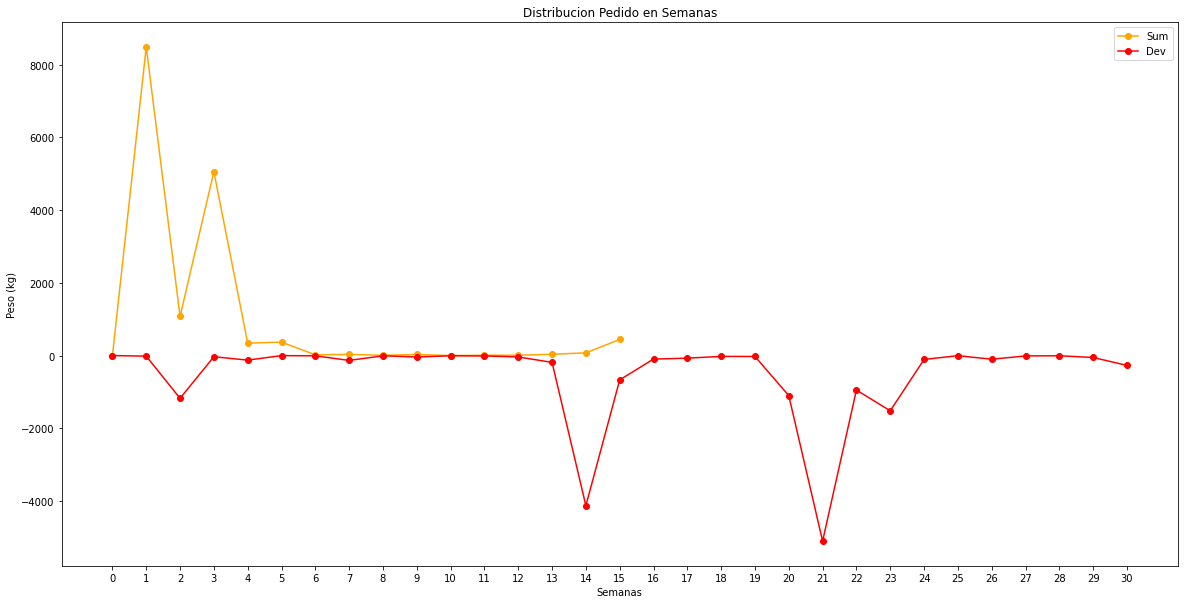

In [48]:
from matplotlib import pyplot as plt

x = np.array(range(1, len(sem)+1))
xd = np.array(range(1, len(sem_d)+1))
ySum = distribucionSum
yDev = distribucionDev
x = np.insert(x, 0, 0)
xd = np.insert(xd, 0, 0)
ySum = np.insert(ySum, 0, 0)
yDev = np.insert(yDev, 0, 0)
# print(x)
# print(y)

# yupper = np.ma.masked_where(y >0, y)
# ylower = np.ma.masked_where(y < 0, y)
# yzero = np.ma.masked_where(ySum == 0, ySum)

f = plt.figure()
f.set_figheight(10)
f.set_figwidth(20)
plt.title("Distribucion Pedido en Semanas")
plt.xlabel("Semanas", labelpad=4)
plt.ylabel("Peso (kg)")
plt.xticks(xd, xd)
plt.plot(x, ySum, color = "orange", marker = "o", label="Sum") #  color = "orange",, label = "Suministro"
plt.plot(xd, yDev, color = "red", marker = "o", label="Dev") #  color = "orange",, label = "Suministro"
# plt.plot(x, 0, color='cyan', linestyle='--', marker = "o", label="Cero") #  color = "orange",, label = "Suministro"
# plt.plot(x, yupper, color='red', marker = "o", label="Dev") #  color = "orange",, label = "Suministro"
# plt.plot(x, ylower, color='orange', marker = "o", label="Sum") #  color = "orange",, label = "Suministro"

labels = ['text{}'.format(i) for i in range(len(x))]
# for label, xx, yy in zip(labels, x, y):
#     plt.annotate(str(yy), xy=(xx, yy), xytext=(xx+0.2, yy-115))
    # arrowprops=dict(facecolor='black', shrink=0.05))

plt.autoscale(True, axis='both')
plt.legend()
plt.show()

## Algoritmo Diferente - VAR
###### Intentamos probar, sin mucho éxito 

In [49]:
from statsmodels.tsa.api import VAR

# Vamos a probar modelos -- VAR
# Quitamos PesoSumAcum, FechaAlbaran y el PtjeDurac -- Mejor consideramos el PesoSumAcum como el peso total suministrado, por probar, y ponemos PtjeDurac 100 para decir que se ha acabado (o que se deberia acabar)
# Quitamos el NumContrato -- no aporta -- En teoria con tener cada pedido separado en semanas el modelo es capaz de interpretar esos periodos (?)
# DiasCto no es posible saberlo en el momento de la predicción --> No sabemos cuanto va a durar un contrato
# PeriSum podemos considerar como el Working Time estimado en AURA

# movDeff2 = movDeff2.drop(columns=['FechaAlbaran', 'DiasCto', 'PtjeDurac', 'PeriSum', 'PesoSumAcum']) #  'NumContrato',

# X2 = movDeff2.drop(columns=['Semana'])
# X2= movDeff2
# X2
# y = movDeff.drop(columns=['PesoSumAcum', 'PtjeDurac', 'PeriSum'])

In [50]:
# model = VAR(X2)

# results = model.fit()

In [51]:
# results

In [52]:
# nuevos_pedidos = pd.DataFrame({'NumContrato': 1231231, 'PesoSum': [112.2, 12333.2, 434.2, 111.3, 34442.2, 3424.4], 'Semana': [1.0, 3.0, 5.0, 6.0, 9.0, 16.0]})
# nuevos_pedidos

In [53]:
# prediccion = results.forecast(X2.values[-len(nuevos_pedidos):], steps=len(nuevos_pedidos), exog_future=nuevos_pedidos) # , exog=nuevos_pedidos

In [54]:
# prediccion

In [55]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
# for i, (ax, column) in enumerate(zip(axes.flat, X2.columns)):
#     ax.plot(X2.index, X2[column], label='Datos Históricos')
#     ax.plot(prediccion.index, prediccion[:,i], label='Prediccion')
#     ax.legend()
#     ax.set_label("Suministro - {column}")
#     ax.set_xlabel("Fecha")
#     ax.set_ylabel("Peso Suministrado")
# plt.tight_layout()
# plt.show()